In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import json

avy = pd.read_csv("avalanches.csv")
avy.columns
avy

,Date,Region,Place,Trigger,Trigger: additional info,Weak Layer,Depth,Width,Vertical,Aspect,...,Buried - Fully,Injured,Killed,Accident and Rescue Summary,Terrain Summary,Weather Conditions and History,Comments 1,Comments 2,Comments 3,Comments 4
0,2/12/2021,Ogden,Ogden,Skier,NaN,Density Change,"6""",10',NaN,Northeast,...,NaN,NaN,NaN,NaN,NaN,NaN,Several soft slab releases with ski cuts. Mana...,NaN,NaN,NaN
1,2/12/2021,Salt Lake,Pioneer Ridge,Natural,NaN,New Snow/Old Snow Interface,"14""",500',500',East,...,NaN,NaN,NaN,NaN,NaN,NaN,The entire rider's right side of the bowl prop...,NaN,NaN,NaN
2,2/12/2021,Salt Lake,Emma Ridges,Skier,NaN,Density Change,"7""",60',NaN,South,...,NaN,NaN,NaN,NaN,NaN,NaN,Descending from the Emma ridge I ski cut an un...,NaN,NaN,NaN
3,2/12/2021,Salt Lake,Butler Fork,Skier,Cornice Triggered,New Snow,"7""",200',300',Northeast,...,NaN,NaN,NaN,NaN,NaN,NaN,Easy clean shears under 6-inches of new high-d...,NaN,NaN,The new-snow avalanche did not step down into ...
4,2/12/2021,Salt Lake,West Desolation Ridge,Natural,NaN,NaN,2',200',NaN,Northeast,...,NaN,NaN,NaN,NaN,NaN,NaN,Natural slide off of West Desolation Ridge. St...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5433,NaN,Salt Lake,Caribou Basin,Unknown,NaN,NaN,7',"1,000'",NaN,North,...,NaN,NaN,NaN,NaN,NaN,NaN,Remnants of a large cornice fracture was obser...,NaN,NaN,NaN
5434,NaN,Salt Lake,Salt Lake,Unknown,NaN,NaN,NaN,100',300',Southwest,...,NaN,NaN,NaN,NaN,NaN,NaN,While snowshoeing above Silver Lake Brighton I...,NaN,NaN,NaN
5435,NaN,NaN,NaN,Natural,NaN,NaN,NaN,600',"4,000'",West,...,NaN,NaN,NaN,NaN,NaN,NaN,I don't know when this avalanche ran--sometime...,NaN,NaN,NaN
5436,NaN,Salt Lake,Main Days,Natural,NaN,Density Change,"14""",NaN,NaN,Northeast,...,NaN,NaN,NaN,NaN,NaN,NaN,Walked up Flagstaff this morning in hopes of f...,NaN,NaN,Pretty scary snowpack setup right now. Rime ...


In [121]:
latLong = pd.DataFrame(avy['Coordinates'].dropna())

latLong = latLong['Coordinates'].str.split(pat = ', ',expand=True)
latLong[0] = latLong[0].astype(float)
latLong[1] = latLong[1].astype(float)
latLong[3] = 2
li = latLong.values.tolist() 

jsonString = json.dumps(li)
jsonString

'[[41.251230398562, -111.89214558813, 2.0], [40.582279522353, -111.57847880037, 2.0], [40.59819117409, -111.63540600449, 2.0], [40.661704015206, -111.64498850872, 2.0], [40.657543311629, -111.61699532183, 2.0], [41.975615394573, -111.4766393474, 2.0], [40.649992869339, -111.62142499001, 2.0], [41.93264594065, -111.50816200886, 2.0], [40.573152852642, -111.60118101748, 2.0], [41.923444189204, -111.45853041324, 2.0], [40.545765373524, -111.62261723192, 2.0], [40.646689472952, -111.59917049226, 2.0], [40.586793504079, -111.70726774844, 2.0], [40.701008113119, -111.60306929262, 2.0], [40.66766756011, -111.60373448047, 2.0], [39.242241018041, -111.46737312004, 2.0], [39.60440417544, -111.28558586779, 2.0], [40.387455631152, -111.17639652118, 2.0], [40.617340423792, -111.69336317688, 2.0], [39.545363984292, -111.20139025419, 2.0], [39.530676899563, -111.17546509448, 2.0], [39.282778441227, -111.46436904596, 2.0], [39.252427419901, -111.47020553278, 2.0], [40.6737255932, -111.66960847857, 2.0

In [152]:
avyDeath = avy[avy['Killed']> 0]
avyDeath['Terrain Summary'] = avyDeath['Terrain Summary'].str.replace(r'\n', '').astype(str)
avyDeath = avyDeath.drop(['Depth', 'Width','Vertical','Elevation','Region','Trigger: additional info', 'Trigger', 'Aspect','Buried - Fully', 'Caught','Carried','Buried - Partly','Injured','Accident and Rescue Summary','Weather Conditions and History','Comments 1','Comments 2','Comments 3','Comments 4'], axis=1)
avyDeath['Killed'] = avyDeath['Killed'].astype(int).astype(str) + " Killed"
avyDeath['Weak Layer']= "Weak Layer: " + avyDeath['Weak Layer']
avyDeath['Description'] = "<b>" + avyDeath['Date'].astype(str) + " - " + avyDeath['Place'] + "</b> <br>" + avyDeath['Killed'] + "<br> Weak Layer: " + avy['Weak Layer']
latlong = avyDeath['Coordinates'].str.split(pat = ', ',expand=True)
avyDeath['Lat'] = latlong[0].astype(float)
avyDeath['long'] = latlong[1].astype(float)


/Users/alessandracoote/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [153]:
avyDeath = avyDeath.drop(['Date','Place','Coordinates','Killed','Terrain Summary', 'Weak Layer'],axis = 1)
avyDeath = avyDeath.dropna()


avyDeathli = avyDeath.values.tolist() 

deathjsonString = json.dumps(avyDeathli)
deathjsonString

'[["<b>2/6/2021 - Wilson Glade</b> <br>4 Killed<br> Weak Layer: Facets", 40.675560803301, -111.67181967408], ["<b>1/30/2021 - Squaretop</b> <br>1 Killed<br> Weak Layer: Facets", 40.667711504163, -111.59965001257], ["<b>1/8/2021 - Dutch Draw</b> <br>1 Killed<br> Weak Layer: Facets", 40.652013353947, -111.59298673846], ["<b>1/18/2020 - Farmington Lakes</b> <br>1 Killed<br> Weak Layer: Facets", 40.975547915289, -111.82198175136], ["<b>2/9/2019 - Chalk Creek</b> <br>1 Killed<br> Weak Layer: Facets", 40.857290413674, -111.01349536709], ["<b>2/7/2019 - Circleville Mountain</b> <br>1 Killed<br> Weak Layer: Facets", 38.200772369793, -112.40453609165], ["<b>1/25/2019 - East Face Laurel Peak</b> <br>1 Killed<br> Weak Layer: Facets", 38.456579716615, -109.23708199209], ["<b>1/18/2019 - Electric Lake</b> <br>1 Killed<br> Weak Layer: Facets", 39.632615873893, -111.24998329796], ["<b>1/31/2016 - Pointy Peak</b> <br>1 Killed<br> Weak Layer: Facets", 40.681035109898, -111.59826941135], ["<b>1/21/2016 

In [137]:
avyDeathli = avyDeath.values.tolist() 

deathjsonString = json.dumps(avyDeathli)
deathjsonString

'[["<b>2/6/2021 - Wilson Glade</b> <br>4 Killed", 40.675560803301, -111.67181967408], ["<b>1/30/2021 - Squaretop</b> <br>1 Killed", 40.667711504163, -111.59965001257], ["<b>1/8/2021 - Dutch Draw</b> <br>1 Killed", 40.652013353947, -111.59298673846], ["<b>1/18/2020 - Farmington Lakes</b> <br>1 Killed", 40.975547915289, -111.82198175136], ["<b>12/15/2019 - Dutch Draw</b> <br>1 Killed", 40.653455506369, -111.59264724185], ["<b>2/9/2019 - Chalk Creek</b> <br>1 Killed", 40.857290413674, -111.01349536709], ["<b>2/7/2019 - Circleville Mountain</b> <br>1 Killed", 38.200772369793, -112.40453609165], ["<b>1/25/2019 - East Face Laurel Peak</b> <br>1 Killed", 38.456579716615, -109.23708199209], ["<b>1/18/2019 - Electric Lake</b> <br>1 Killed", 39.632615873893, -111.24998329796], ["<b>1/31/2016 - Pointy Peak</b> <br>1 Killed", 40.681035109898, -111.59826941135], ["<b>1/21/2016 - Gobblers Knob</b> <br>1 Killed", 40.666951474815, -111.68539988481], ["<b>3/4/2015 - Hells Canyon</b> <br>1 Killed", 41.2

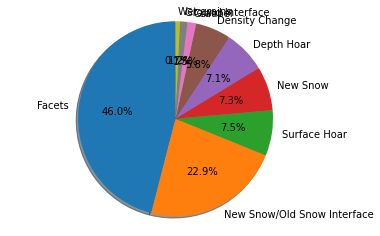

In [54]:
avyCaught = avy[avy['Caught'] > 0]
myList = avyCaught.Place.value_counts()
places = list(myList.index)
occurance = list(myList)
avyCaught.Place.value_counts()
avyCaught['Weak Layer'].value_counts()
avyCaught.Region.value_counts()
avyCaught.Trigger.value_counts()
aspectList = avyCaught['Weak Layer'].value_counts()
mySizes = list(aspectList)
mylabels = list(aspectList.index)


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = mylabels
sizes = mySizes

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

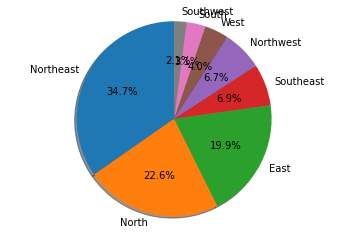

In [28]:
avy.Region.value_counts()
avy.Trigger.value_counts()
aspectList = avy.Aspect.value_counts()
mySizes = list(aspectList)
mylabels = list(aspectList.index)


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = mylabels
sizes = mySizes

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

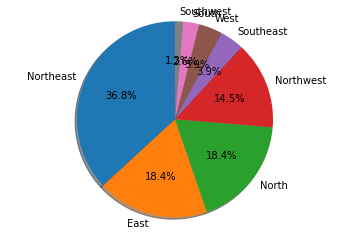

In [45]:
avyCaught.Region.value_counts()
avyCaught.Trigger.value_counts()
aspectList = avyCaught.Aspect.value_counts()
mySizes = list(aspectList)
mylabels = list(aspectList.index)


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = mylabels
sizes = mySizes

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()